# **Facial Emotion Detection**

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/My_Data/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "/content/Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

###**Happy**

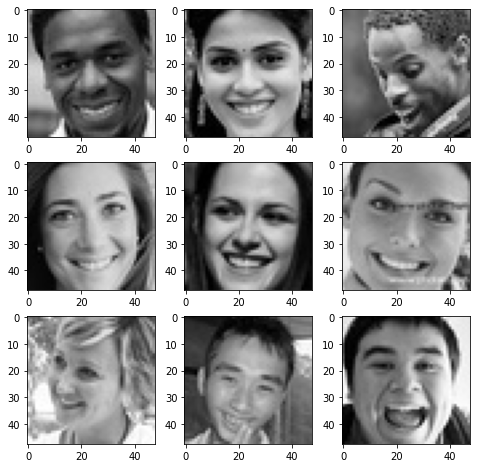

In [24]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- The face angle are different per picture.
- There are happy that the teeth is showing but there are also close mouth without showing its teeth.
- The eyelids are closer to each other

###**Sad**

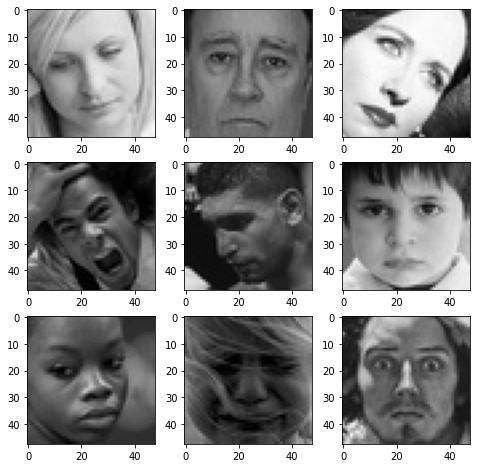

In [25]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- Some imagess that are sad is touching their heads with their hands
- No teeth are shown when the person is sad
- the lips are more likely touching each other with downward angle
- The eye position is looking away from the camera.

###**Neutral**

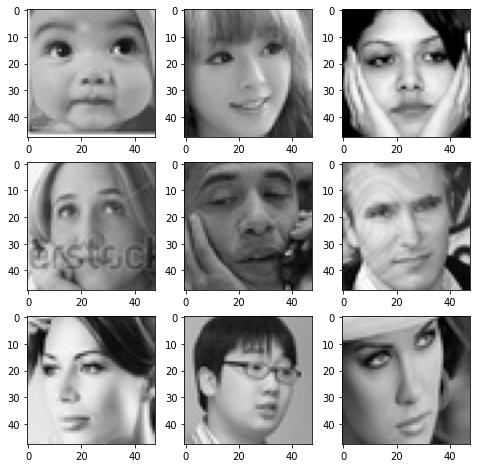

In [26]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- There are different angle of face position.
- It can have a problem on recogninzing neutral and Sad as it a bit similarities on facial expression
- The lips are more likely to be touching each other

###**Surprise**

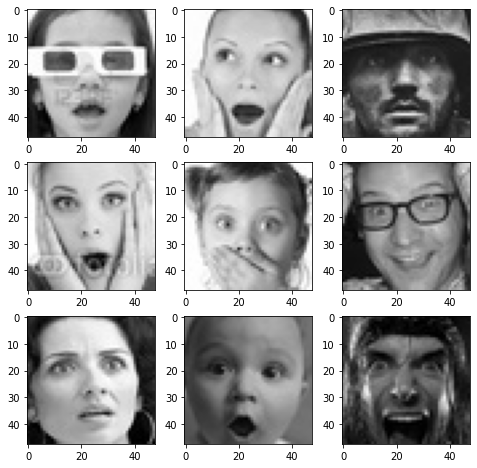

In [27]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- The eyes are rounder than other facial emotions
- Mouth are open wide
- Hands are visible closer to their cheeks.

## **Checking Distribution of Classes**

In [28]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)
# Write the code to get the number of training images from the class 'sad'.

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)
# Write the code to get the number of training images from the class 'neutral'.

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)
# Write the code to get the number of training images from the class 'surprise'.

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


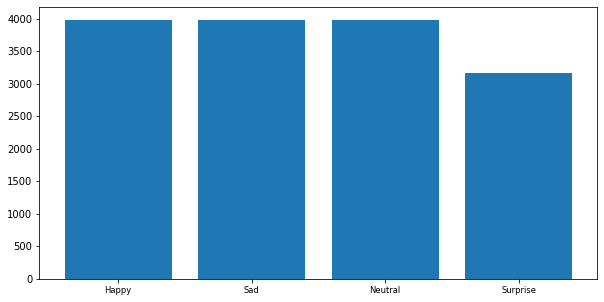

In [29]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**
- 3 categories 'happy, 'sad', and 'neutral' are equally distributed
- 'surprise' image is showing less count but not a huge gap with other categories
- We can use the appropriate evaluation methods for imbalanced classification like Precision and Recall to evaluate this model.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

In [10]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)

datagen_test = ImageDataGenerator(rescale = 1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

The model that was built below are the final model that I chosen. This model was built using 4 layers of Convolution Neural Network

In [18]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [20]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from livelossplot.inputs.tf_keras import PlotLossesCallback

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

checkpoint = ModelCheckpoint("model.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

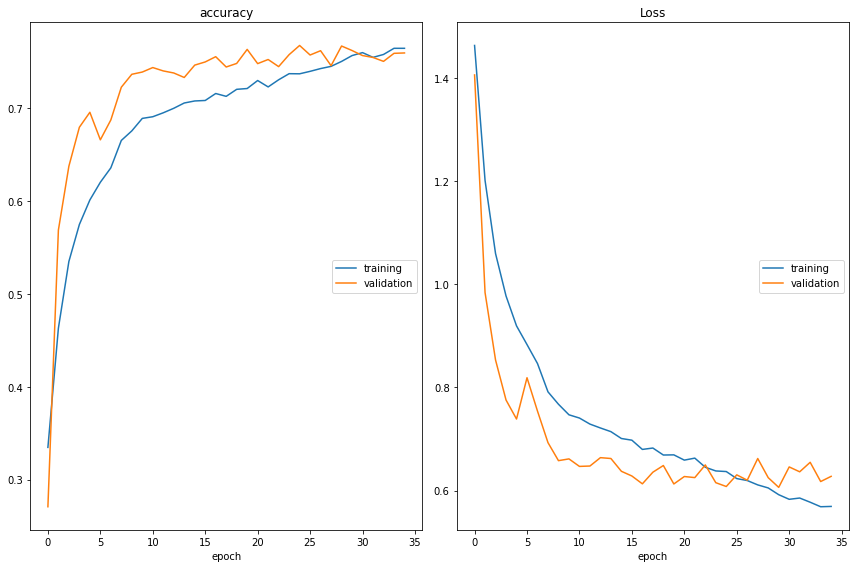

accuracy
	training         	 (min:    0.335, max:    0.764, cur:    0.764)
	validation       	 (min:    0.271, max:    0.768, cur:    0.759)
Loss
	training         	 (min:    0.569, max:    1.463, cur:    0.569)
	validation       	 (min:    0.606, max:    1.406, cur:    0.627)

Epoch 35: saving model to model.h5
472/472 [==============================] - 19s 41ms/step - loss: 0.5691 - accuracy: 0.7645 - val_loss: 0.6275 - val_accuracy: 0.7595 - lr: 1.0000e-04


In [21]:
history = model.fit(
    x=train_set,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_set,
    validation_steps = validation_steps,
    callbacks=callbacks
)

### **Evaluating the Model on the Test Set**

In [22]:
test_images, test_labels = next(test_set)
accuracy = model.evaluate(test_images, test_labels, verbose = 1)

1/1 [==============================] - 0s 223ms/step - loss: 0.2842 - accuracy: 0.9062


Found 128 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.76      0.81      0.79        32
           2       0.81      0.78      0.79        32
           3       0.91      0.94      0.92        32

    accuracy                           0.86       128
   macro avg       0.86      0.86      0.86       128
weighted avg       0.86      0.86      0.86       128



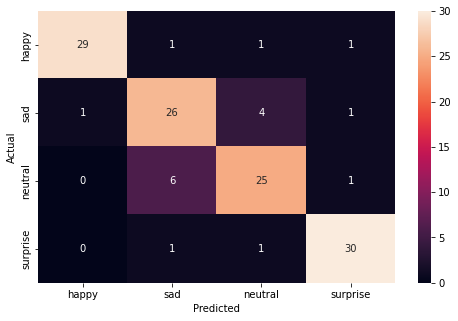

In [23]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true,pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

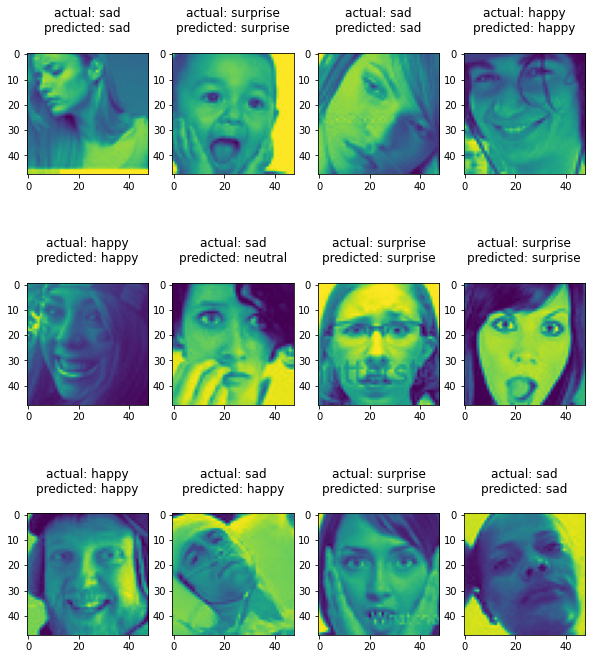

In [81]:
import tensorflow as tf
rows = 3

cols = 4

emotionlabels = ['happy', 'sad', 'neutral', 'surprise']

fig = plt.figure(figsize = (10, 12))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(test_images))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        image = test_images[random_index]

        ax.imshow(image[:, :, 0])

        pred_label = emotionlabels[pred[random_index]]

        true_label = emotionlabels[y_true[random_index]]
        
        ax.set_title("actual: {}\npredicted: {}\n".format(
               true_label, pred_label
        ))
plt.show()

## **Conclusion:**
- I choose the model of Complex Convolution Neural network. Because of the highest tain accuracy of 76% and validation accuracy of 74%
- Overfitting has been taken care by refining of Hyperparameters and adam learning.
- I got also 90% accuracy prediction on my 128 images of test set which is pretty much high compare to any other models that I tested
- With this model having 91% precision and 94% recall which gives some good results in our prediction.
-Based on the confusion matrix it is noticeable that there is a difficulty on predicting sad and neutral. As we can see on the data set there is somewhat images that are categorize as neutral but looks more of a sad image. 
- Health industries can possibly benefit with this kind of 90% accuracy on test set. Predicting at this rate will give confindence in using this model that it can recognize the proper emotion of the person.
- With this accuracy an precision I would like to implement this model of health industry on which there are kids that are diagnose with ASD so that it can help them recognize the emotion of the people around them